In [12]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as dt

In [13]:
def day_of_period(y,m,d,y0):

    '''This function takes a date in y,m,d format and returns the value of the
    days since jan 1, y0 (the time convention of reanalysis). Inputs are integers. 
    Output is an integer.''' 
    
    d0 = datetime(y0,1,1) # the datetime object representing 12am, jan 1 of the baseline year of the reanalysis
    d = datetime(y,m,d) # the datetime object for the day and time being tested
    
    t = dt.date2num(d) - dt.date2num(d0) # number of hours since 12am, jan 1 of the baseline year
    # dt.date2num gives the number of days since the python datetime time origin. 
    
    return int(t)

In [14]:
save_path = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Output_Data/Feb24/'

# Load the data files
mu_file_str = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Input_Data/Acacia_Lows/closed_lows_mu_era5_2017_sea.txt'
pg_file_str = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Input_Data/Nick_Lows/closed_lows_pg_era5_2017_sea.txt'
pv_file_str = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Input_Data/Portmann_Lows/pv_cutoffs_sea.txt'

mu_array = np.loadtxt(mu_file_str, delimiter = ',')
pg_array = np.loadtxt(pg_file_str, delimiter = ',')
pv_array = np.loadtxt(pv_file_str, delimiter = ',')

In [15]:
# Correct the tstep column (column 5) with the day_of_period function here:

In [20]:
tracking_scheme_years = (1979, 2017)
numyears_tracking = tracking_scheme_years[1] - tracking_scheme_years[0] + 1

# Construct the array of monthly means here
months = np.arange(1,13,1)

month_systems = np.zeros((len(months), 4), dtype = float)

for ii in range(len(months)):

    month_systems[ii,0] = months[ii]

    # Get the number of systems for the pg dataset
    month_lows_pg = pg_array[pg_array[:,2] == months[ii], :]
    month_systems_pg = np.shape(month_lows_pg[:,5])[0] / 4
    month_systems[ii,1] = month_systems_pg/ numyears_tracking

    # Get the number of systems for the mu dataset
    month_lows_mu = mu_array[mu_array[:,2] == months[ii], :]
    month_systems_mu = np.shape(month_lows_mu[:,5])[0] / 4
    month_systems[ii,2] = month_systems_mu/ numyears_tracking

    # Get the number of systems for the pv dataset
    month_lows_pv = pv_array[pv_array[:,1] == months[ii], :]
    month_systems_pv = np.shape(month_lows_pv)[0] / 4
    month_systems[ii,3] = month_systems_pv/ numyears_tracking


In [28]:
# Add the data for P06 for the months April-October, 1979-2009
risbey_years = (1979,2009) # dataset overlap period
numyears = risbey_years[1] - risbey_years[0] + 1

R13_file_str = '/home/561/nxg561/00_Tracking_Scheme_Comparison/Input_Data/R13/pook2009lows.txt'
R13_dataset = np.loadtxt(R13_file_str, delimiter = ',')

# Take the subset of years
overlap_rows = (R13_dataset[:,0] >= risbey_years[0]) & (R13_dataset[:,0] <= risbey_years[1])
R13_dates = R13_dataset[overlap_rows,0:3]

# Construct the array of monthly means here
R13_months = np.arange(4,11,1)

R13_month_systems = np.zeros((len(R13_months), 4), dtype = float)

for ii in range(len(R13_months)):

    R13_month_systems[ii,0] = R13_months[ii]

    # Get the number of systems for the pg dataset
    month_lows_R13 = R13_dates[R13_dates[:,1] == R13_months[ii], :]
    month_systems_R13 = np.shape(month_lows_R13)[0]
    R13_month_systems[ii,1] = month_systems_R13/ numyears


In [29]:
print(R13_month_systems)

[[ 4.          5.41935484  0.          0.        ]
 [ 5.          7.29032258  0.          0.        ]
 [ 6.          7.70967742  0.          0.        ]
 [ 7.          8.03225806  0.          0.        ]
 [ 8.          6.77419355  0.          0.        ]
 [ 9.          5.19354839  0.          0.        ]
 [10.          5.96774194  0.          0.        ]]


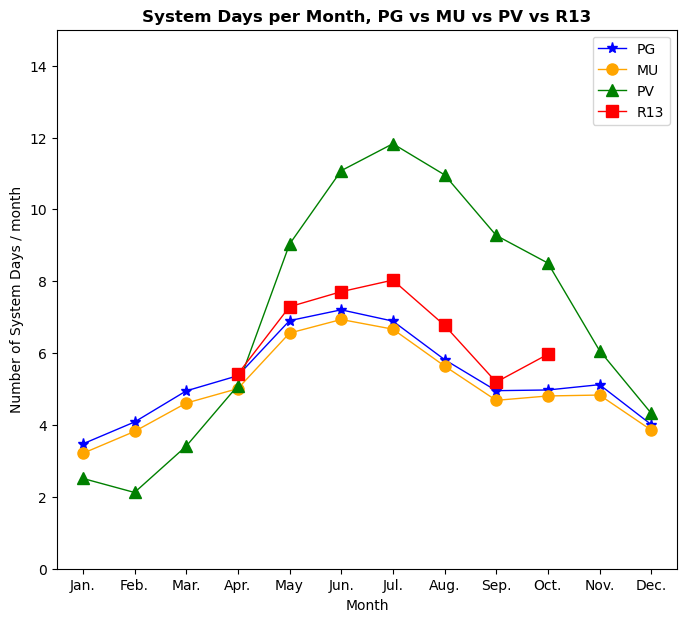

In [30]:
# Month cycle
months = range(1,13,1)
month_labels = ('Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.')

# Create a plot(figure) object, and then an axes object on that plot object
fig = plt.figure(figsize = (8,7))
#ax = fig.add_axes([0,0,1.3,1])
ax1 = fig.add_subplot(1,1,1) # Where the numbers refer to (rows, cols, plot number). 

# Set the axes attributes for the top graph here
ax1.set_title('System Days per Month, PG vs MU vs PV vs R13', weight = 'bold')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of System Days / month')

ax1.set_xlim(months[0] - 0.5, months[-1] + 0.5)
ax1.set_ylim(0, 15)
ax1.set_xticks(month_systems[:,0])
ax1.set_xticklabels(month_labels)

ax1.plot(month_systems[:,0], month_systems[:,1], color='blue', marker='*',linewidth=1, markersize=8)
ax1.plot(month_systems[:,0], month_systems[:,2], color='orange', marker='o',linewidth=1, markersize=8)
ax1.plot(month_systems[:,0], month_systems[:,3], color='green', marker='^',linewidth=1, markersize=8)
ax1.plot(R13_month_systems[:,0], R13_month_systems[:,1], color='red', marker='s',linewidth=1, markersize=8)

ax1.legend(['PG', 'MU', 'PV', 'R13'], loc = 'upper right')

# Tighten up the spacing of the subplots
plt.subplots_adjust(hspace = 0.5)

plt.savefig(save_path + 'systems_month_pg_mu_pv_R13.png', format = 'png', bbox_inches = 'tight') 

plt.show()

In [15]:
from scipy import stats

significance_level = 0.05

def correlation_func(x, y):
    
    ii = np.where(y != np.nan)[0]
    
    r = np.corrcoef(x[ii],y[ii])[0,1]
    
    #print('r: ', r)
    
    years = len(ii)
    
    #Degrees of freedom
    df = years - 2
    
    # compute t-statistic using method from STA501
    t = r / np.sqrt((1 - r ** 2) / df)
    
    ## Compare with the critical t-value
    
    #p-value after comparison with the t 
    p = 1 - stats.t.cdf(t,df = df) # this line does need the 1 - p factor. stats.t.cdf() 
    # returns the area of the t distribution BELOW the given t value. 
    #print('p: ', p)
    
    return r,p


In [12]:
year_systems[:,0]

array([1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017.])

In [16]:
pg_pre = year_systems[:22,1] # The year 2000 is at index 21
mu_pre = year_systems[:22,2]

pg_post = year_systems[22:,1]
mu_post = year_systems[22:,2]

In [17]:
# Correlation before and including 2000
correlation_func(pg_pre, mu_pre)

(0.9846463011805728, 0.0)

In [18]:
# Correlation after 2000
correlation_func(pg_post, mu_post)

(0.9053221721723578, 2.9173090443368466e-07)